<a href="https://colab.research.google.com/github/LinGuanMing/BFS_DFS_Algorithm/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人工智慧 作業二

---



# 加載程式所需的函示庫

In [1]:
import collections
import numpy as np
from itertools import permutations

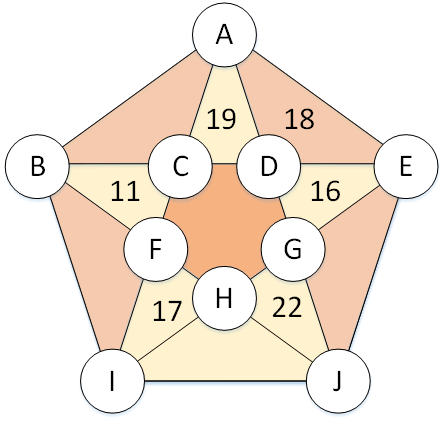

# 將圖中所用到的數值存入容器

In [2]:
nodeValues = {}
initNodesSum = {
    'ACD': 19, 'ADE': 18,
    'BCF': 11, 'DEG': 16,
    'FHI': 17, 'GHJ': 22
    }
triangleNodes = {
    'ACD': ['BCF', 'ADE', 'DEG'],
    'ADE': ['DEG'],
    'BCF': ['FHI'],
    'DEG': ['GHJ'],
    'FHI': ['GHJ'],
    'GHJ': ['FHI']
    }
NextNodes = {
    'A': ['B', 'C', 'D', 'E'],
    'B': ['C', 'F', 'I'],
    'C': ['B', 'D', 'F'],
    'D': ['C', 'E', 'G'],
    'E': ['D', 'G', 'J'],
    'F': ['H', 'I'],
    'G': ['H', 'J'],
    'H': ['I', 'J'],
    'I': ['J'],
    'J': []
    }

# 將圖中三角形周圍節點 A-J 以 1-10 數字填滿
# 並滿足三角形周圍三個節點相加等於三角形中的數字
# 例如:A+C+D=19

以窮舉法計算出三角形周圍節點數字

避免浪費計算時間，遇到相鄰數字相同則跳過

並排除計算三角形周圍節點相加不等於欲求總和的組合

例如:A+C+D=19 非19則跳過不處理

In [3]:
def get_random_dict():
    for kA in range(1, 11):
        for kB in range(1, 11):
            if kA == kB:
                continue
            for kC in range(1, 11):
                if kC == kA or kC == kB:
                    continue
                for kD in range(1, 11):
                    if kD == kC or kD == kB or kD == kA or kA + kC + kD != initNodesSum.get('ACD'):
                        continue
                    for kE in range(1, 11):
                        if kE == kD or kE == kC or kE == kB or kE == kA or kA + kD + kE != initNodesSum.get('ADE'):
                            continue
                        for kF in range(1, 11):
                            if kF == kE or kF == kD or kF == kC or kF == kB or kF == kA or kB + kC + kF != initNodesSum.get('BCF'):
                                continue
                            for kG in range(1, 11):
                                if kG == kF or kG == kE or kG == kD or kG == kC or kG == kB or kG == kA or kD + kE + kG != initNodesSum.get('DEG'):
                                    continue
                                for kH in range(1, 11):
                                    if kH == kG or kH == kF or kH == kE or kH == kD or kH == kC or kH == kB or kH == kA:
                                        continue
                                    for kI in range(1, 11):
                                        if kI == kH or kI == kG or kI == kF or kI == kE or kI == kD or kI == kC or kI == kB or kI == kA or kF + kH + kI != initNodesSum.get('FHI'):
                                            continue
                                        for kJ in range(1, 11):
                                            if kJ == kI or kJ == kH or kJ == kG or kJ == kF or kJ == kE or kJ == kD or kJ == kC or kJ == kB or kJ == kA or kG + kH + kJ != initNodesSum.get('GHJ'):
                                                continue
                                            if kA + kC + kD == initNodesSum.get('ACD') and \
                                                kA + kD + kE == initNodesSum.get('ADE') and \
                                                kB + kC + kF == initNodesSum.get('BCF') and \
                                                kD + kE + kG == initNodesSum.get('DEG') and \
                                                kF + kH + kI == initNodesSum.get('FHI') and \
                                                kG + kH + kJ == initNodesSum.get('GHJ'):
                                                nodeValues['A'] = kA
                                                nodeValues['B'] = kB
                                                nodeValues['C'] = kC
                                                nodeValues['D'] = kD
                                                nodeValues['E'] = kE
                                                nodeValues['F'] = kF
                                                nodeValues['G'] = kG
                                                nodeValues['H'] = kH
                                                nodeValues['I'] = kI
                                                nodeValues['J'] = kJ
                                                return

# 搭配隊列結構容器執行BFS及DFS演算法

In [4]:
def getflow(root, method):
    visited = set() # 暫存所有訪問過的節點紀錄
    queue = collections.deque([root]) # 將起始節點加入隊列結構容器
    flow = collections.deque() # 紀錄訪問流程

    visited.add(root)
    while queue:
        triangle = queue.popleft() # 從隊列頭部(左端)取出進行後續演算法處理
        flow.append(triangle)
        IsFirst = True # DFS用於紀錄節點處理相鄰之集合
        for next_triangle in triangleNodes[triangle]: # 處理節點所有相鄰之集合
            if next_triangle not in visited: # 訪問過的節點跳過不處理
                if method == 'BFS':
                    queue.append(next_triangle)
                elif method == 'DFS':
                    if IsFirst:
                        queue.appendleft(next_triangle) # 加入到隊列左端，走到盡頭時可往返到上一層
                    else:
                        queue.insert(1, next_triangle) # 加入到處理中的隊列左端下一個節點
                IsFirst = False
                visited.add(next_triangle)
    return flow

# 使用貪婪優先搜尋法找出最短路徑

In [5]:
def getShortestPath(startNode, endNode: list):
    visited = set()
    flow = collections.deque()
    flow.append(startNode)
    while True:
        neighborDist = 10
        visited.add(startNode)
        for nodes in NextNodes[startNode]:
            if nodes not in visited:
                if abs(nodeValues['A'] - nodeValues[nodes]) < neighborDist:
                    neighborDist = abs(nodeValues['A'] - nodeValues[nodes])
                    nextNode = nodes
        startNode = nextNode
        flow.append(nextNode)
        if nextNode in endNode:
            break
    return list(flow)

# 主程式開始

In [6]:
if __name__ == '__main__':
    get_random_dict()
    print('Nodes value:', end=' ')
    IsFirst = True
    for val in nodeValues:
        if IsFirst:
            IsFirst = False
            print(val + ': ' + str(nodeValues.get(val)), end='')
        else:
            print(', ' + val + ': ' + str(nodeValues.get(val)), end='')
    print()
    print()
    
    BFSFlow = getflow('ACD', 'BFS')
    print('BFS Path:', end=' ')
    for path in BFSFlow:
        if path == BFSFlow[-1]:
            print(path)
        else:
            print(path, '->', end=' ')
    print()

    DFSFlow = getflow('ACD', 'DFS')
    print('DFS Path:', end=' ')
    for path in DFSFlow:
        if path == DFSFlow[-1]:
            print(path)
        else:
            print(path, '->', end=' ')
    print()

    shortestPath = getShortestPath('A', ['I', 'J'])
    print('Shortest Path: ', end=' ')
    for path in shortestPath:
        if path == shortestPath[-1]:
            print(path)
        else:
            print(path, '->', end=' ')

Nodes value: A: 9, B: 6, C: 2, D: 8, E: 1, F: 3, G: 7, H: 10, I: 4, J: 5

BFS Path: ACD -> BCF -> ADE -> DEG -> FHI -> GHJ

DFS Path: ACD -> BCF -> FHI -> GHJ -> DEG -> ADE

Shortest Path:  A -> D -> G -> H -> J
